In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../../")
import utils.utils as uti

### Import data from WA

In [3]:
# Path to the uploaded CSV file and upload it
from corpus_preprocessing.preprocessWA import remove_extra_rows_WA
df_filtered_wa, conduct_cols  = remove_extra_rows_WA()
df_filtered_wa['rule16'] = np.nan
df_filtered_wa

Percentage of samples kept: 69.48%


,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,"John A. Walsh (WSBA No. 20603, admitted 1991),...",3.4,8.4d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Louis A. Ferreira (WSBA No. 20646, admitted 19...",1.2,1.8,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"Roland O. Foster Balloun (WSBA No. 20884, admi...",1.1,1.14,1.15,1.8,1.8,3.3,3.4,4.4,8.4c,8.4d,8.4l,NaN,NaN,NaN,NaN,NaN
20,"Thomas G. Batson (WSBA No. 20888, admitted 199...",1.14,8.4c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,"Kevin G. Healy (WSBA No. 16307, admitted 1986)...",1.8,1.8,8.4c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,"Brad A. Plumb (WSBA No. 20337, admitted 1991),...",3.3,8.4b,8.4c,8.4i,8.4k,8.4n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1239,"Clinton L. Morgan (WSBA No. 22181, admitted 19...",1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1240,"Stephen B. Blanchard (WSBA No. 12294, admitted...",1.1,1.14,1.2,1.3,1.4,1.5,3.2,8.4c,8.4l,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1241,"Mark Stansfield (WSBA No. 11356, admitted 1980...",1.2,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Import data from NJ

In [4]:
df_filtered_wa.columns.values

array(['Description', 'rule1', 'rule2', 'rule3', 'rule4', 'rule5',
       'rule6', 'rule7', 'rule8', 'rule9', 'rule10', 'rule11', 'rule12',
       'rule13', 'rule14', 'rule15', 'rule16'], dtype=object)

In [5]:
from corpus_preprocessing.preprocessNJ import remove_extra_rows_NJ, extract_labels_rpc_NJ
df_filtered_nj = remove_extra_rows_NJ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nj.columns.values)):
    df_filtered_nj[str(i)+"_empty"] = np.nan
df_filtered_nj.columns = df_filtered_wa.columns.values
df_filtered_nj

Percentage of samples kept: 11.99%


,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,"Censured on a certified record on July 20, 201...",1.15,8.1,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
1,Disbarred on a certified record on September 1...,1.15,1.15,1.15,5.5,8.1,8.1,8.4,None,None,None,None,None,None,None,None,NaN
2,"Reprimanded on June 2, 2017, for violating RPC...",1.7,1.8,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
3,"Reprimanded on December 1, 2017 (231 N.J. 165)...",1.3,3.2,3.5,3.4,8.4,None,None,None,None,None,None,None,None,None,None,NaN
4,"Reprimanded on November 27, 2017 (231 N.J. 167...",1.8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Admitted: 1960; Atlantic City (Atlantic County...,1.5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
464,Admitted: 1978; Elizabeth (Union County) Suspe...,1.5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
465,Admitted: 1970; Totowa (Passaic County) Public...,1.7,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
466,Admitted: 1971; Fort Lee (Bergen County) Suspe...,1.15,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN


### Import data from GA

In [6]:
from corpus_preprocessing.preprocessGA import remove_extra_rows_GA
df_filtered_ga = remove_extra_rows_GA()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_ga.columns.values)):
    df_filtered_ga[str(i)+"_empty"] = np.nan
df_filtered_ga.columns = df_filtered_wa.columns.values
df_filtered_ga

Percentage of rows kept: 57.32% 1042


,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,Because Bret Jerald Pangborn has failed to ade...,4.3,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
1,IA ROU SEE ee Oe?\n\nThis disciplinary matter ...,8.4,8.4 (a),None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
2,S15Y0084. IN THE MATTER OF LYLE VINCENT ANDERS...,8.4,8.4 (a),None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
3,The State Bar filed two Notices of Discipline ...,3.1,8.1,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
4,Because James M. Kimbrough has failed to adequ...,4.3,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,This matter is before the Court on Respondent ...,1.1,1.3,1.4,1.16,None,None,None,None,None,None,None,None,None,None,NaN,NaN
1038,SUPREME COURT OF GEORGIA\nCase No. S17Y1192\nS...,4.3,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
1039,This disciplinary matter is before the Court o...,1.3,3.3,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
1040,This matter is before the Court on the Report ...,1.1,1.3,1.15,1.4,1.16,1.5,3.1,None,None,None,None,None,None,None,NaN,NaN


### Import data from AZ

In [7]:
from corpus_preprocessing.preprocessAZ import preprocess_AZ
df_filtered_az = preprocess_AZ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_az.columns.values)):
    df_filtered_az[str(i)+"_empty"] = np.nan
df_filtered_az.columns = df_filtered_wa.columns.values
df_filtered_az

Percentage of rows kept: 96.77%


,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,Upon withdrawing from representation in a diss...,1.1,1.15,1.6,8.1,None,None,None,None,None,None,None,None,None,None,None,None
1,Respondent filed an unverified disclosure stat...,1.3,1.4,1.2,3.2,3.4,4.4,8.4,None,None,None,None,None,None,None,None,None
2,Respondent accepted retainers from clients and...,1.1,1.3,1.15,1.4,1.16,1.2,1.5,3.1,3.2,3.3,3.4,8.4,None,None,None,None
3,"In a criminal matter, Respondent failed to fil...",1.3,3.2,3.4,8.1,8.4,None,None,None,None,None,None,None,None,None,None,None
4,Respondent engaged in a conflict of interest b...,1.7,1.8,8.1,8.4,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,"As a court appointed arbitrator, Respondent fa...",1.3,1.4,1.2,8.1,8.4,None,None,None,None,None,None,None,None,None,None,None
566,Respondent while representing a client in a d...,3.1,3.4,None,None,None,None,None,None,None,None,None,None,None,None,None,None
567,Respondent failed to conduct discovery as requ...,1.1,1.3,1.4,1.2,8.4,None,None,None,None,None,None,None,None,None,None,None
568,Respondents represented a doctor in a medical ...,3.3,3.4,5.5,8.1,8.4,8.4 (d),None,None,None,None,None,None,None,None,None,None


### Import data from NC

In [8]:
from corpus_preprocessing.preprocessNC import preprocess_NC
df_filtered_nc = preprocess_NC()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nc.columns.values)):
    df_filtered_nc[str(i)+"_empty"] = np.nan
df_filtered_nc.columns = df_filtered_wa.columns.values
df_filtered_nc

Percentage of rows kept: 67.36% 1515


,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,i I' NORTH CAROLINA BEFORE THE DISCIPLINARY H...,5.4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"5'5-~ STATE OF NORTH CAROLINA , , , COUNTy ...",1.3,8.1,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,- /) 0&;27 : ____0_~---------~------~--~ BE...,1.1,1.16,1.5,None,None,None,None,None,None,None,None,None,None,None,None,None
3,tZ\LPrg • _ WAKE COUNTY ~ .......... t.. .....,1.3,3.8,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,.. 'I '0 NORTH CAROLINA .- ---'-'- ---~-...,1.2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,NORTH CARO-r.;tNA BEFORE THE DISCIPLINARY HEA...,1.8,1.2,1.9,3.5,5.1,5.4,5.7,7.1,None,None,None,None,None,None,None,None
1511,".t 23""5 ~,:.::.~ i:fEFOkE'fi:iE --. ,. NORTH ...",1.3,8.1,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1512,NORTH CAROLINA BEFORE THE GRIEVANCE COMMITTEE...,1.1,1.3,1.4,8.4,None,None,None,None,None,None,None,None,None,None,None,None
1513,"- -, NORTH CAROLINA BEFORE THE GRIEVANCE COM...",1.7,1.8,1.9,3.3,None,None,None,None,None,None,None,None,None,None,None,None


### Import data from MD

In [9]:
from corpus_preprocessing.preprocessMD import preprocess_MD
df_filtered_md = preprocess_MD()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_md.columns.values)):
    df_filtered_md[str(i)+"_empty"] = np.nan
df_filtered_md.columns = df_filtered_wa.columns.values
df_filtered_md

Percentage of rows kept: 10.95% 88


,Description,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16
0,for failure to act with reasonable diligence a...,1.3,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,"on april 20, 2010 by the court of appeals for ...",1.1,1.3,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,"court of appeals on september 4, 2008 for misu...",1.1,1.15,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,"the court of appeals on july 15, 2010 for her ...",1.1,1.3,1.15,1.4,1.16,1.2,1.5,8.4 (c),8.1,8.4,NaN,NaN,NaN,NaN,NaN,NaN
4,(with the right to reapply for readmission aft...,1.1,1.15,1.4,1.2,1.5,8.4,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,"july 21, 2009 by the court of appeals based on...",1.1,1.15,5.1,5.3,8.4,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
84,"the court of appeals on april 28, 2009 for lac...",1.3,3.2,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
85,for failure to appear at his client’s hearing....,1.3,8.4,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
86,"july 21, 2009 by the court of appeals based on...",1.1,1.15,8.4,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


### Combine the data from the states into one DataFrame

In [10]:
# df_all_states = pd.concat([df_filtered_wa.reset_index(drop=True), df_filtered_nj,
# df_filtered_ga ,df_filtered_az, df_filtered_nc, df_filtered_md], axis=0, ignore_index=True)
# df_all_states

### Find unique labels in the whole dataset

In [11]:
# unique_conducts = np.sort(pd.Series(df_all_states[conduct_cols].values.ravel()).dropna().unique())
# print((unique_conducts), len(unique_conducts))

### Group the labels into 10 bins

In [12]:
dict_unique_conducts = {"1.1":1, "1.3":1, 
        "1.15":2, "1.15a":2, "1.15 (a)":2, "1.15A":2, "1.15 (A)":2,"1.15b":2,"1.15 (b)":2, "1.15B":2, "1.15 (B)":2,
        "1.4":3,
        "1.7":4, "1.8":4, "1.10":4, "1.11":4, "1.16":4, "1.17":4,
        "1.2":5, "1.5":5, "1.6":5, '1.9':5, "1.12":5, '1.13':5, '1.14':5,
        "2.1":6, "2.2":6, "2.3":6, "2.4":6, "3.1":6, "3.2":6, "3.3":6, "3.4":6, "3.5":6, "3.6":6, "3.7":6, "3.8":6, "3.9":6,
        "4.1":7, "4.2":7, "4.2.":7, "4.3":7, "4.4":7, "5.1":7, "5.2":7, "5.3":7, "5.4":7, "5.5":7, "5.6":7, "5.7":7,"5.8":7,
         "6.1":7, "6.2":7, "6.3":7, "6.4":7, "6.5":7, "7.1":7, "7.2":7, "7.3":7, "7.4":7, "7.5":7,"7.6":7,
        "8.4b":8, '8.4 (b)':8,
        "8.4c":9, '8.4 (c)':9,
        '8.1':10, '8.2':10, '8.4':10, '8.4a':10, '8.4 (a)':10, '8.4d':10, '8.4 (d)':10, '8.4e':10, '8.4 (e)':10, '8.4h':10, 
        '8.4 (h)':10, '8.4i':10, '8.4 (i)':10, '8.4j':10, '8.4 (j)':10, '8.4k':10, '8.4 (k)':10, '8.4l':10, '8.4 (l)':10, '8.4m':10, '8.4 (m)':10,
         '8.4n':10, '8.4 (n)':10, '8.5':10}

### Replace labels by corresponding bin identificators

In [13]:
unique_bins = list(set(dict_unique_conducts.values()))
# df_all_states = df_all_states.replace(dict_unique_conducts)
# df_all_states

In [14]:
# unique_conducts = pd.Series(df_all_states[conduct_cols].values.ravel()).dropna().unique()
# print((unique_conducts), len(unique_conducts))

### Create list of dataframes

In [15]:
df_all_states = [df_filtered_wa.replace(dict_unique_conducts), df_filtered_nj.replace(dict_unique_conducts), df_filtered_ga.replace(dict_unique_conducts),
df_filtered_az.replace(dict_unique_conducts), df_filtered_nc.replace(dict_unique_conducts), df_filtered_md.replace(dict_unique_conducts)]

/var/folders/sv/qn9ckc8d6bs84hdk8qfbjcgh0000gn/T/ipykernel_87764/3240478085.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all_states = [df_filtered_wa.replace(dict_unique_conducts), df_filtered_nj.replace(dict_unique_conducts), df_filtered_ga.replace(dict_unique_conducts),
/var/folders/sv/qn9ckc8d6bs84hdk8qfbjcgh0000gn/T/ipykernel_87764/3240478085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered_az.replace(dict_unique_conducts), df_filtered_nc.replace(dict_unique_conducts), df_filtered_md.replace(dict_uniqu

### Preprocess Descriptions

In [16]:
# Preprocess data by converting text to lowercase, removing non-word characters and numbers, 
# excluding the specific word 'wsba', exclude single characters, tokenizing, removing stopwords, and applying lemmatization or stemming if method = "stemming"

# preprocessor = uti.TextPreprocessor(method='lemmatization')
# preprocessed_descriptions = df_all_states['Description'].apply(preprocessor.preprocess)
# preprocessed_descriptions

preprocessed_descriptions_all_states = []
preprocessor = uti.TextPreprocessor(method='lemmatization')
for df in df_all_states:
    preprocessed_descriptions_all_states.append(df['Description'].apply(preprocessor.preprocess))

In [17]:
preprocessed_descriptions_all_states[1]

0      censure certify record july violate rpc failur...
1      disbar certify record september nj violate rpc...
2      reprimand june violate rpc engage conflict int...
3      reprimand december nj violate rpc lack diligen...
4      reprimand november nj violate rpc enter prohib...
                             ...                        
463    admit atlantic city atlantic county admonition...
464    admit elizabeth union county suspension year n...
465    admit totowa passaic county public reprimand n...
466    admit fort lee bergen county suspension month ...
467    admit edison middlesex county public reprimand...
Name: Description, Length: 468, dtype: object

### Classification using BERT

In [18]:
import full_bert_classification as bert
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


In [19]:
# Set up parameters
bert_model_name = 'bert-base-uncased'
num_classes = 2
max_length = 128
batch_size = 128
num_epochs = 2
learning_rate = 1e-4


In [ ]:
scores = np.zeros([len(preprocessed_descriptions_all_states), len(unique_bins)])
freq_label = np.zeros([len(preprocessed_descriptions_all_states), len(unique_bins)])
for i, preprocessed_description in enumerate(preprocessed_descriptions_all_states):
    if i == 1:
        break
    # define testing set 
    df_test = df_all_states[i]
    # combine the rest of states into signle dataframe
    df_train = pd.concat([x for ii,x in enumerate(df_all_states) if ii!=i] , axis=0, ignore_index=True)
    # combine the rest of descriptions into single set
    x_train = list(np.concatenate([list(x.values) for ii,x in enumerate(preprocessed_descriptions_all_states) if ii!=i]))
    for j, label in enumerate(unique_bins):
        # index with(out) label for test data
        mask_test = df_test[conduct_cols].isin([label])
        test_with_label = df_test[mask_test].dropna(how='all').index.values.tolist()
        test_without_label = np.setdiff1d(np.array(preprocessed_description.index),np.array(test_with_label))
 
        # index with(out) label for train data
        mask_train = df_train[conduct_cols].isin([label])
        train_with_label = df_train[mask_train].dropna(how='all').index.values.tolist()
        train_without_label = np.setdiff1d(np.array(df_train.index),np.array(train_with_label))

        # frequency of label in TESTING set 
        freq_label[i, j] = len(test_with_label)/(len(test_with_label) + len(test_without_label))

        y_test = pd.DataFrame(np.append(np.ones(len(test_with_label)), np.zeros(len(test_without_label))),index = np.append(test_with_label, test_without_label))
        y_train = pd.DataFrame(np.append(np.ones(len(train_with_label)), np.zeros(len(train_without_label))),index = np.append(train_with_label, train_without_label))

        tokenizer = BertTokenizer.from_pretrained(bert_model_name)
        train_dataset = bert.TextClassificationDataset(x_train, list(map(int, y_train.values.flatten())), tokenizer, max_length)
        val_dataset = bert.TextClassificationDataset(preprocessed_description.values, list(map(int, y_test.values.flatten())), tokenizer, max_length)
        train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

        # Set up the device and model
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = bert.BERTClassifier(bert_model_name, num_classes).to(device)

        # Set up optimizer and learning rate scheduler
        optimizer = AdamW(model.parameters(), lr=learning_rate)
        total_steps = len(train_dataloader) * num_epochs
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    
        # Training the model
        for j, epoch in enumerate(range(num_epochs)):
            print(f"Epoch {epoch + 1}/{num_epochs}")
            bert.train(model, train_dataloader, optimizer, scheduler, device)
            accuracy, report = bert.evaluate(model, val_dataloader, device)
            print("Accuracy: ", accuracy)
         # estimate the accuracy of the model
        scores[i, j] = accuracy



### Accuracy estimation of the log regression model

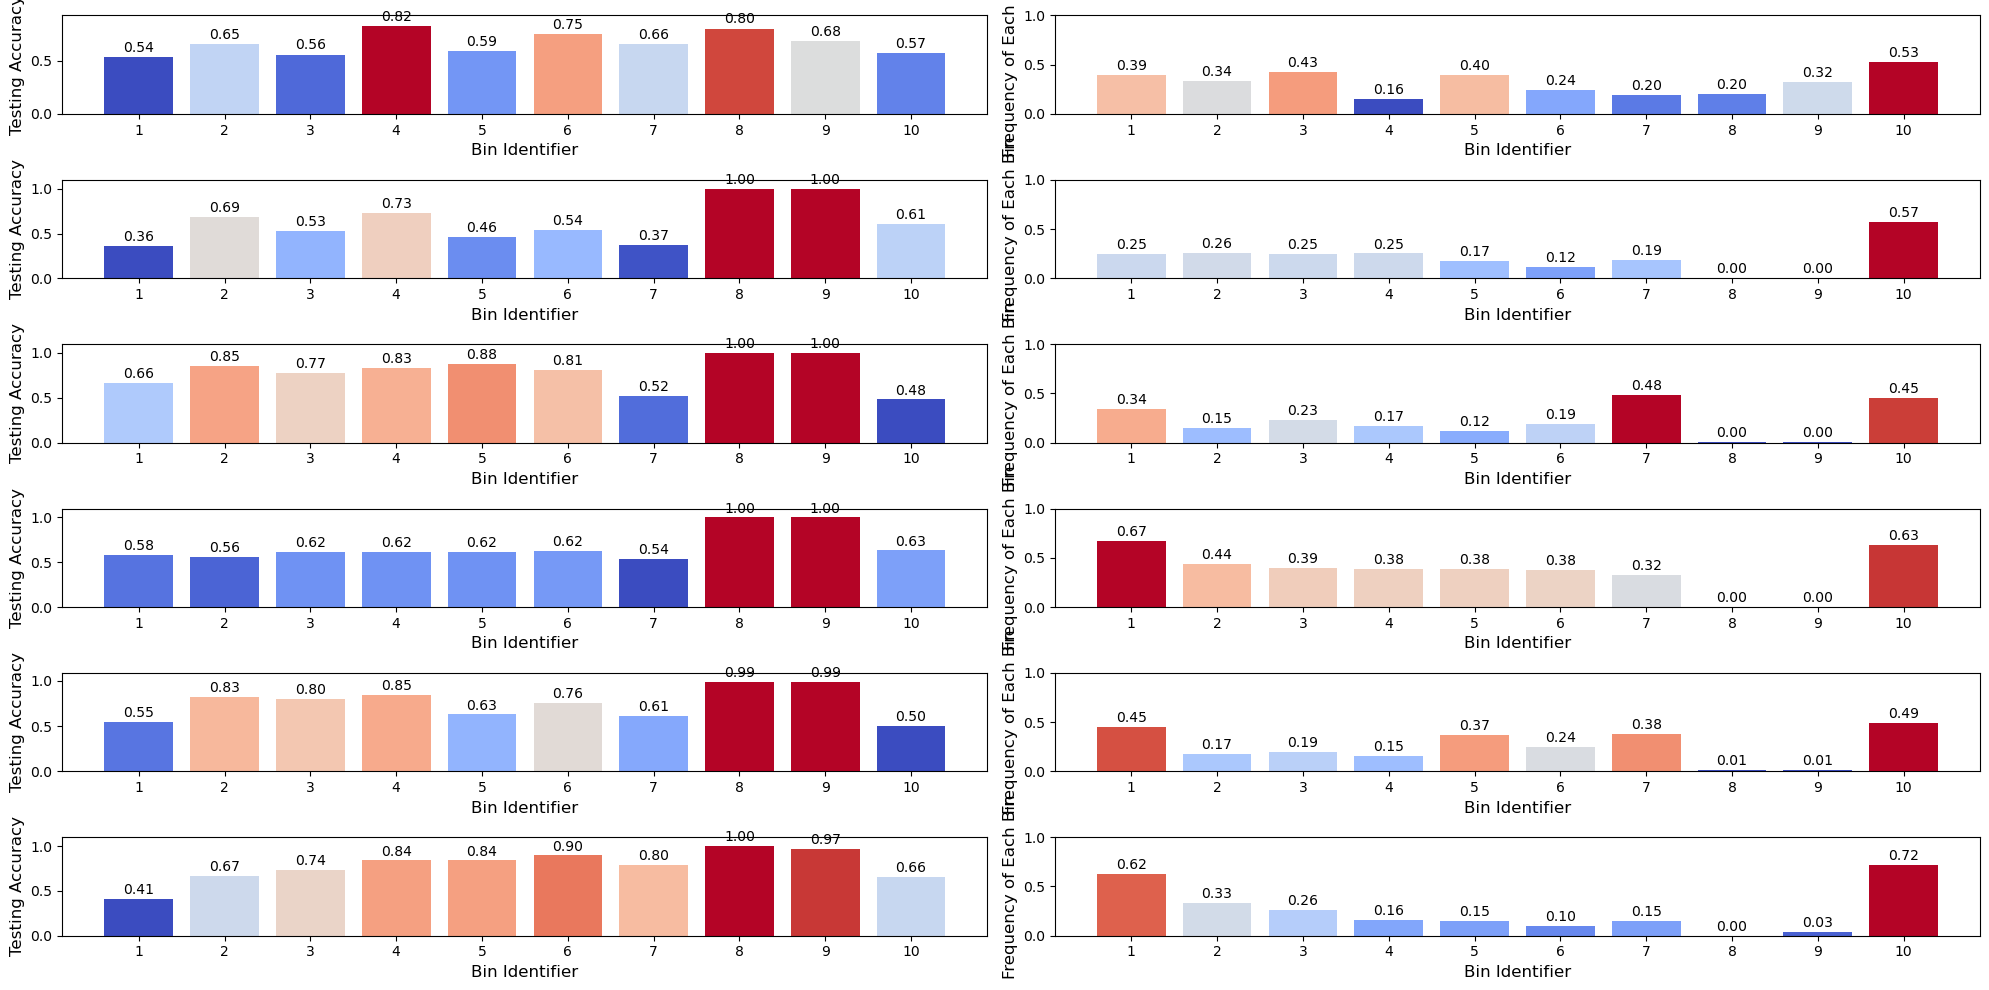

In [ ]:
# Create a new figure with two subplots (side by side) including the exact frequency labels on top
import matplotlib.pyplot as plt

import matplotlib.cm as cm



fig, ax = plt.subplots(len(preprocessed_descriptions_all_states), 2, figsize=(20, 10))

for i,_ in enumerate(preprocessed_descriptions_all_states):
    score = scores[i, :]
    colors = cm.coolwarm((score - min(score)) / (max(score) - min(score)))

    # Plot the original histogram with gradient colors (first subplot)
    ax[i,0].bar(unique_bins, score, color=colors, width=0.8, align='center')
    ax[i,0].set_xlabel("Bin Identifier", fontsize=12)
    ax[i,0].set_ylabel("Testing Accuracy", fontsize=12)
    ax[i,0].set_ylim(0, max(score) + 0.1)
    ax[i,0].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    # Display the exact height above each bar
    for j, value in enumerate(score):
        ax[i,0].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Plot the new histogram with frequency (second subplot)
    colors = cm.coolwarm((freq_label[i, :] - min(freq_label[i, :])) / (max(freq_label[i, :]) - min(freq_label[i, :])))
    ax[i,1].bar(unique_bins, freq_label[i, :], color=colors, width=0.8, align='center')
    ax[i,1].set_xlabel("Bin Identifier", fontsize=12)
    ax[i,1].set_ylabel("Frequency of Each Bin", fontsize=12)
    ax[i,1].set_ylim(0, 1)
    ax[i,1].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    # Display the exact frequency above each bar
    for j, value in enumerate(freq_label[i, :]):
        ax[i,1].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Display the plot with both subplots

    plt.tight_layout()
plt.show()  # Show the complete plot with two subplots, with exact frequencies